#Week 4: Supervised Learning - Classification - Iris
-------------------------------------
Lab exercise kali ini menggunakan dataset iris:
https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv

Lakukan klasifikasi pada dataset tersebut dengan menggunakan 3 cara: Logistic Regression, Naive Bayes, dan K-Nearest Neighbor (dengan k=5)

## Import library

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Load Dataset

In [4]:
# Read CSV
df = pd.read_csv('https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Data Preprocessing

Periksa apakah ada baris yang duplikat



In [5]:
df1 = df.duplicated().value_counts()
df1 

False    147
True       3
dtype: int64

In [6]:
df1.drop_duplicates(keep='first', inplace=True)
sum(df1.duplicated())

0

Periksa apakah ada missing values

In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Periksa outlier dengan boxplot untuk setiap kolom feature

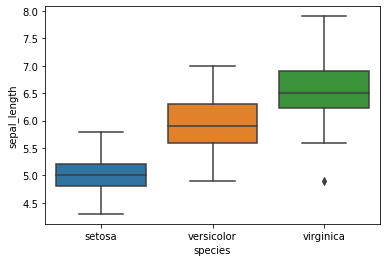

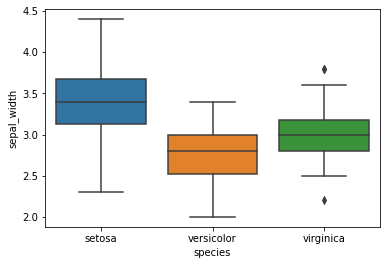

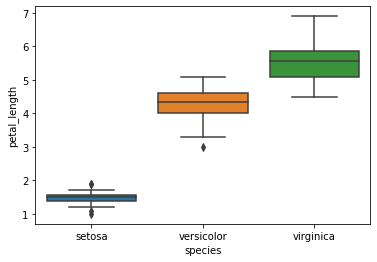

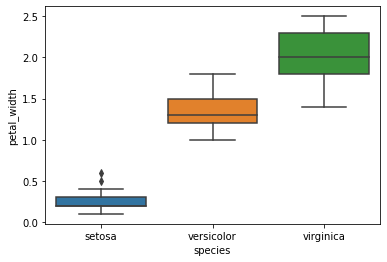

In [27]:
sns.boxplot(x='species', y='sepal_length', data=df)
plt.show()
sns.boxplot(x='species', y='sepal_width', data=df)
plt.show()
sns.boxplot(x='species', y='petal_length', data=df)
plt.show()
sns.boxplot(x='species', y='petal_width', data=df)
plt.show()

Pisahkan dataset menjadi variabel independen dan variabel dependen

In [10]:
x = df[['sepal_length','sepal_width','petal_length', 'petal_width']]
y = df['species']

Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.1

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.1)

Lakukan fitur scaling pada variabel X_train dan X_test. 

In [13]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#Logistic Regression

Bangun model dan ukur accuracy nya

In [14]:
from sklearn.linear_model import LogisticRegression 
classifier =  LogisticRegression(random_state=0).fit(x,y)

Uji model dengan dataset test

In [15]:
y_pred = classifier.predict(X_test)
print(y_pred)

['setosa' 'versicolor' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa']


In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n', cm)
print('Accuracy Score: ',  accuracy_score(y_test, y_pred))

Confusion Matrix
 [[3 0 0]
 [8 0 0]
 [3 1 0]]
Accuracy Score:  0.2


# Naive Bayes

Buat model persamaan berdasarkan data training yang sudah dibuat pada tahap preprocess

In [20]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

Uji hasil model dengan data test

In [21]:
y_pred = clf.predict(X_test)
print(y_pred)


['setosa' 'virginica' 'setosa' 'setosa' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'virginica' 'versicolor' 'versicolor'
 'virginica' 'versicolor' 'versicolor' 'virginica']


Ukur akurasi dari model persamaan Naive Bayes Classifier

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print('Confusion Matrix\n', cm)
print('Accuracy Score: ',  accuracy_score(y_test, y_pred))

Confusion Matrix
 [[3 0 0]
 [0 8 0]
 [0 0 4]]
Accuracy Score:  1.0


# K-Nearest Neighbour (K-NN) Classifier

Buatlah model KNN berdasarkan data training yang sudah dibuat di tahap preprocess, gunakan metric pengukuran jarak 'euclidean'

In [23]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 2, metric = 'euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

Uji model dengan data test

In [24]:
y_pred = classifier.predict(X_test)
print(y_pred)

['setosa' 'virginica' 'setosa' 'setosa' 'versicolor' 'virginica'
 'versicolor' 'versicolor' 'virginica' 'versicolor' 'versicolor'
 'virginica' 'versicolor' 'versicolor' 'virginica']


Ukur akurasi dari model K-Nearest Neighbor

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print('Confusion Matrix\n', cm)
print('Accuracy Score: ',  accuracy_score(y_test, y_pred))

Confusion Matrix
 [[3 0 0]
 [0 7 1]
 [0 0 4]]
Accuracy Score:  0.9333333333333333


#Kesimpulan
Dari 3 model klasifikasi di atas (Logistic Regression, Naive Bayes, K-Nearest Neighbor) model klasifikasi dengan akurasi tertinggi adalah...